In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import statsmodels.api as sm
import seaborn as sns

In [89]:
# read in the datasets
df_train = pd.read_csv('//Users/asorrentino/ds-work/homework/final-projects/data/train.csv')
df_macro = pd.read_csv('/Users/asorrentino/ds-work/homework/final-projects/data/macro.csv')

# Apartment Building Characteristics

Isolating variables related to internal building characteristics and target variable.


In [90]:
df_train_apt = df_train[['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'price_doc']]

In [91]:
df_train_apt.describe()

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,state,price_doc
count,"30,471.00","24,088.00","30,304.00","20,899.00","16,866.00","20,899.00","20,899.00","16,912.00","30,471.00"
mean,54.21,34.40,7.67,12.56,"3,068.06",1.91,6.40,2.11,"7,123,035.28"
std,38.03,52.29,5.32,6.76,"154,387.80",0.85,28.27,0.88,"4,780,111.33"
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"100,000.00"
25%,38.00,20.00,3.00,9.00,"1,967.00",1.00,1.00,1.00,"4,740,002.00"
50%,49.00,30.00,6.50,12.00,"1,979.00",2.00,6.00,2.00,"6,274,411.00"
75%,63.00,43.00,11.00,17.00,"2,005.00",2.00,9.00,3.00,"8,300,000.00"
max,"5,326.00","7,478.00",77.00,117.00,"20,052,009.00",19.00,"2,014.00",33.00,"111,111,112.00"


In [92]:
df_train_apt.corr()

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,state,price_doc
full_sq,1.00,0.16,0.09,0.12,-0.01,0.70,0.02,-0.09,0.34
life_sq,0.16,1.00,0.05,0.04,-0.00,0.19,0.00,-0.07,0.17
floor,0.09,0.05,1.00,0.45,0.00,-0.01,-0.01,-0.11,0.12
max_floor,0.12,0.04,0.45,1.00,-0.00,-0.01,0.02,-0.07,0.09
build_year,-0.01,-0.00,0.00,-0.00,1.00,-0.01,0.00,0.30,0.00
num_room,0.70,0.19,-0.01,-0.01,-0.01,1.00,0.02,0.08,0.48
kitch_sq,0.02,0.00,-0.01,0.02,0.00,0.02,1.00,0.05,0.03
state,-0.09,-0.07,-0.11,-0.07,0.30,0.08,0.05,1.00,0.12
price_doc,0.34,0.17,0.12,0.09,0.00,0.48,0.03,0.12,1.00


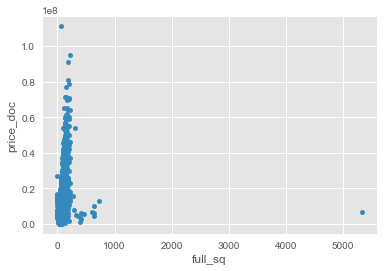

In [93]:
df_train_apt.plot.scatter(x='full_sq', y='price_doc');

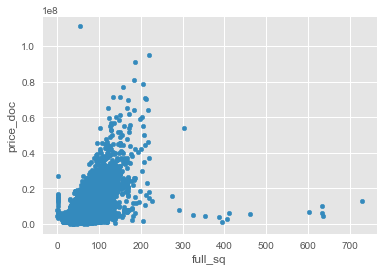

In [102]:
df_train_apt = df_train_apt.where(df_train_apt['full_sq'] < 2000)
df_train_apt.plot.scatter(x='full_sq', y='price_doc');

In [103]:
df_train_apt.corr()

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,state,price_doc
full_sq,1.00,0.29,0.14,0.12,-0.01,0.70,0.02,-0.09,0.56
life_sq,0.29,1.00,0.05,0.04,-0.00,0.19,0.00,-0.07,0.17
floor,0.14,0.05,1.00,0.45,0.00,-0.01,-0.01,-0.11,0.12
max_floor,0.12,0.04,0.45,1.00,-0.00,-0.01,0.02,-0.07,0.09
build_year,-0.01,-0.00,0.00,-0.00,1.00,-0.01,0.00,0.30,0.00
num_room,0.70,0.19,-0.01,-0.01,-0.01,1.00,0.02,0.08,0.48
kitch_sq,0.02,0.00,-0.01,0.02,0.00,0.02,1.00,0.05,0.03
state,-0.09,-0.07,-0.11,-0.07,0.30,0.08,0.05,1.00,0.12
price_doc,0.56,0.17,0.12,0.09,0.00,0.48,0.03,0.12,1.00


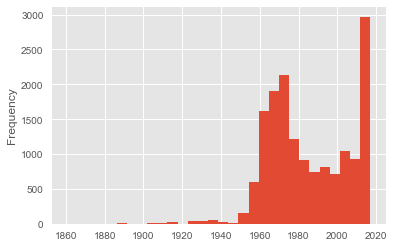

In [113]:
df_train_apt = df_train_apt.where(df_train_apt['build_year'] > 1691)
df_train_apt = df_train_apt.where(df_train_apt['build_year'] < 2018)
df_train_apt['build_year'].plot.hist(orientation='vertical', cumulative=False, bins=30)

In [151]:
num_of_trans = df_train['build_year'].groupby(df_train['timestamp'])

In [168]:
df_train['yearmonth'] = df_train['timestamp'].apply(lambda x: x[:4]+x[5:7])
grouped_df_year = df_train.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()

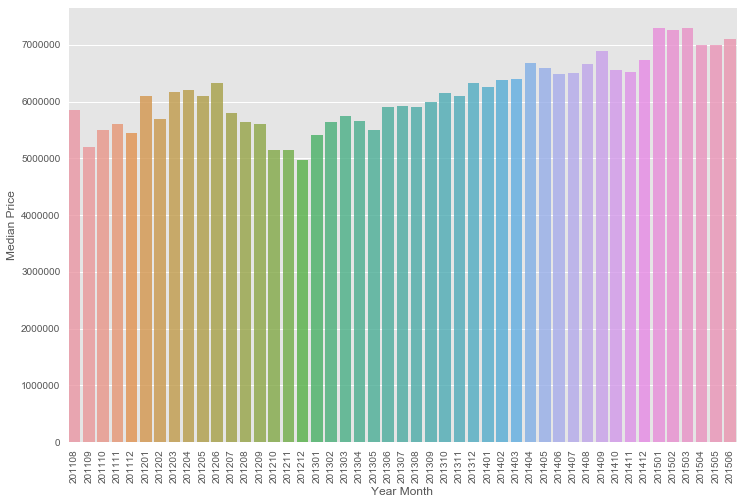

In [169]:
plt.figure(figsize=(12,8))
sns.barplot(grouped_df.yearmonth.values, grouped_df.price_doc.values, alpha=0.8)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

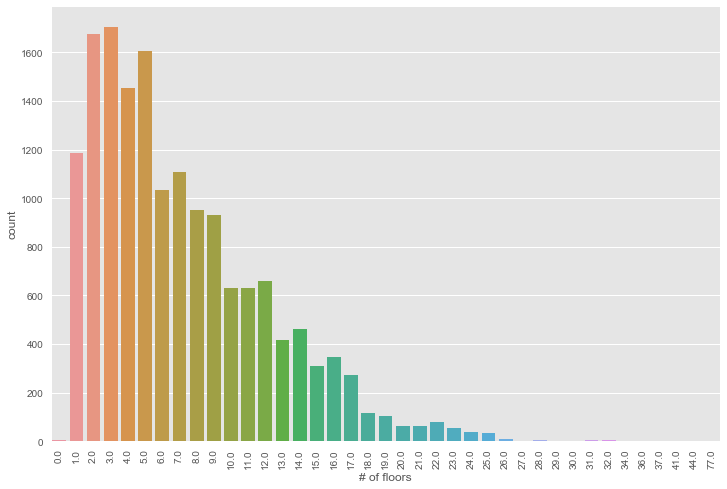

In [167]:
plt.figure(figsize=(12, 8))
sns.countplot(x='floor', data=df_train_apt)
plt.ylabel('count', fontsize=12)
plt.xlabel('# of floors', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

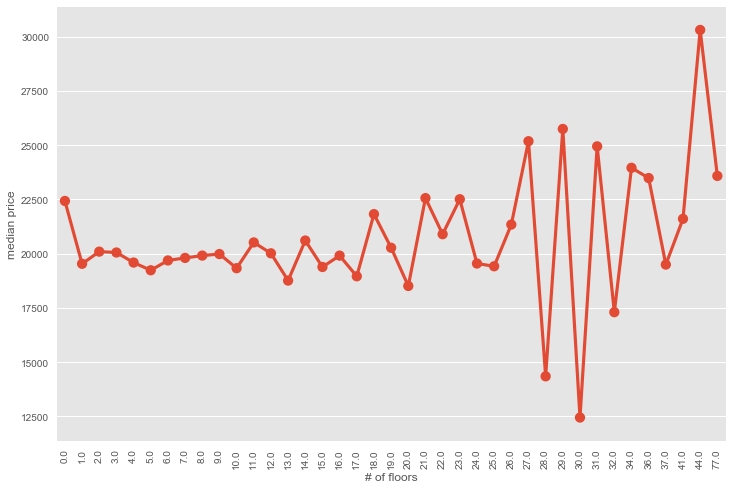

In [171]:
grouped_df_floor = df_train_apt.groupby('floor')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df_floor.floor.values, grouped_df_floor.price_doc.values, alpha=0.8)
plt.ylabel('median price', fontsize=12)
plt.xlabel('# of floors', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
grouped_df_

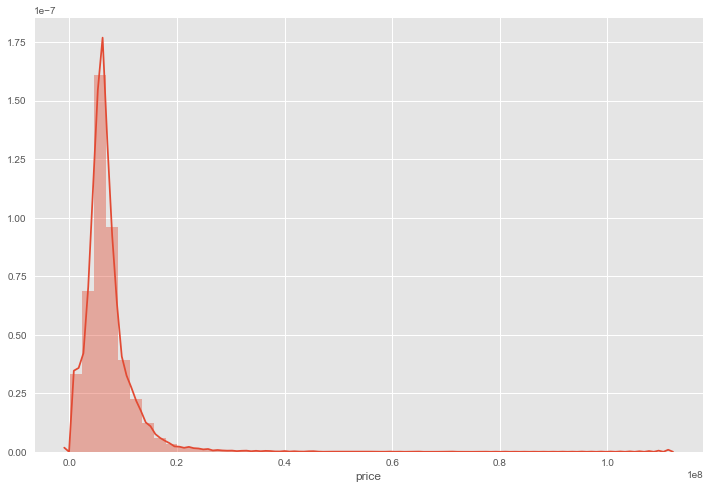

In [164]:
plt.figure(figsize=(12,8))
sns.distplot(df_train.price_doc.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

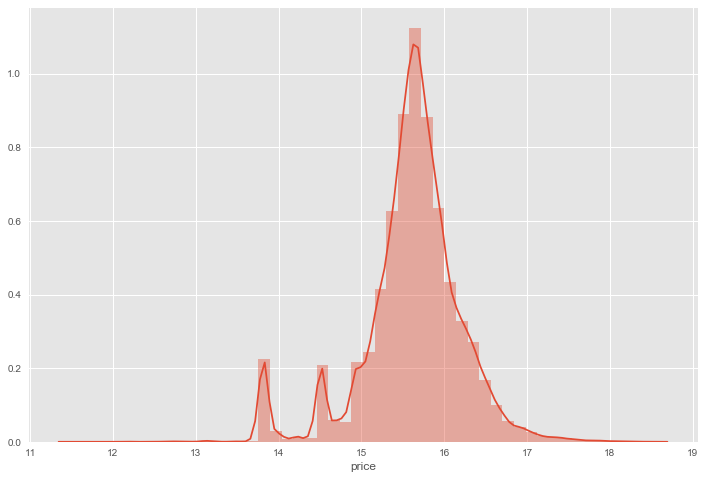

In [165]:
plt.figure(figsize=(12,8))
sns.distplot(np.log(df_train.price_doc.values), bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()